### Summary
The project was done with the purpose of finding out factors which affected the Performance of the employees, training a model which accurately predicts the Performance Rating of the employee, analyzing the data to provide recommendations to improve the performance and gain insights from the analysis. The following steps were carried out<br>
- Import the data provided, find out the predictor & target variables and look for missing values.<br>
- Analysis of Department wise performance as asked.<br>
- Label Encoding the ordinal columns.<br>
- Calculate correlation coeffecient to find out the relationship between variables and then select the important features for analysis.<br>
- Standardizing the data and splitting it into trian and test<br>
- Training the data using algorithms like Logistic Regression, Support Vector Machine, Decision Tree, Random Forest and checking the accuracy to find out which algorithm is the best.<br>
- Exporting the model with highest accuracy.


### Analysis
The positively correlated features are Environment satisfaction, last salary hike percent and workleife performance Rating. <br>
<br>
The negatively correlated are YearsSinceLastPromotion, ExperienceYears at this Company, Experience years in current role& Years with current Manager. by this we can say that they are negatively correlated

## Recommendations
From this we can conclude that the if the company provides better environment then there will be an increase in the performance of the employee and the company should even increase the salary of the employees by time to time which will help to maintain a good worklife balance. <br>
If the manager is changed or shuffled then it will effect the performance of an employee and the factors which are negatively correlated should not be varied much

#### All the required modules are imported

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

#### Importing the data from the given data set(INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls)

In [2]:
data=pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

#### Performing Exploratory Data Analysis(EDA)

In [3]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [4]:
pd.set_option('display.max_rows',None,'display.max_columns',None)

In [5]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


#### Getting all information of the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

#### Checking for null values

In [7]:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [8]:
data.shape

(1200, 28)

### Department wise performance Analysis

In [9]:
department=data.iloc[:,[5,27]]
dept=department

In [10]:
dept.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: PerformanceRating, dtype: int64

<AxesSubplot:xlabel='EmpDepartment', ylabel='PerformanceRating'>

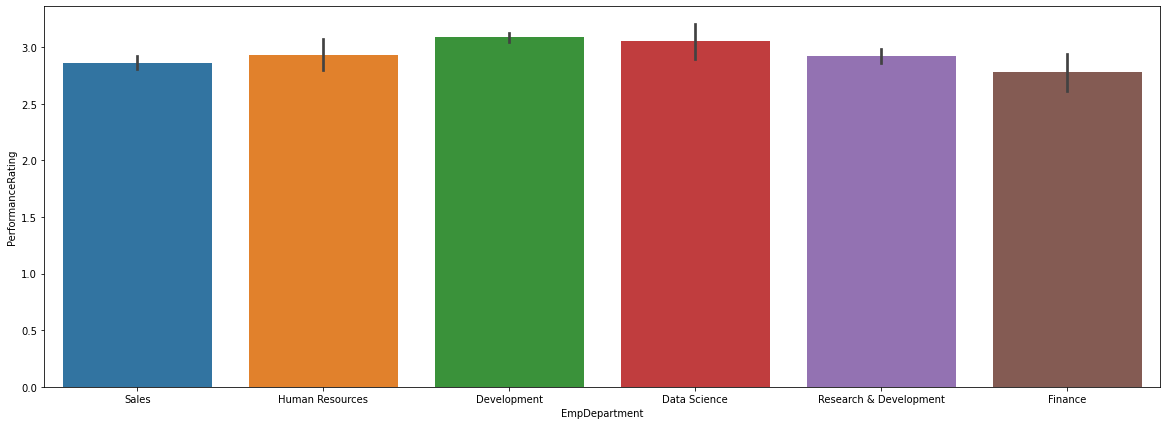

In [11]:
plt.figure(figsize=(20,7))
sb.barplot(dept['EmpDepartment'],dept['PerformanceRating'])

In [12]:
# Creating a new dataframe to analyze each department separately
department = pd.get_dummies(dept['EmpDepartment'])
performance = pd.DataFrame(dept['PerformanceRating'])
department_rating = pd.concat([department,performance],axis=1)
department_rating

,Data Science,Development,Finance,Human Resources,Research & Development,Sales,PerformanceRating
0,0,0,0,0,0,1,3
1,0,0,0,0,0,1,3
2,0,0,0,0,0,1,4
3,0,0,0,1,0,0,3
4,0,0,0,0,0,1,3
5,0,1,0,0,0,0,4
6,0,0,0,0,0,1,3
7,0,1,0,0,0,0,3
8,0,1,0,0,0,0,3
9,0,1,0,0,0,0,3


<AxesSubplot:xlabel='PerformanceRating', ylabel='Research & Development'>

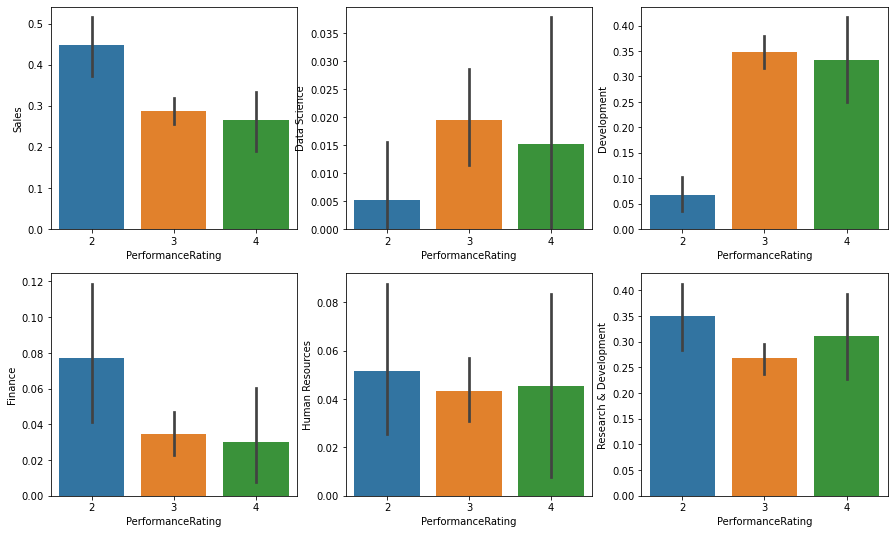

In [13]:
# Plotting a separate bar graph for performance of each department using seaborn
fig=plt.figure(figsize=(15,9))
plt.subplot(2,3,1)
sb.barplot(department_rating['PerformanceRating'],department_rating['Sales'])
plt.subplot(2,3,2)
sb.barplot(department_rating['PerformanceRating'],department_rating['Data Science'])
plt.subplot(2,3,3)
sb.barplot(department_rating['PerformanceRating'],department_rating['Development'])
plt.subplot(2,3,4)
sb.barplot(department_rating['PerformanceRating'],department_rating['Finance'])
plt.subplot(2,3,5)
sb.barplot(department_rating['PerformanceRating'],department_rating['Human Resources'])
plt.subplot(2,3,6)
sb.barplot(department_rating['PerformanceRating'],department_rating['Research & Development'])

In [42]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

### Data processing

In [14]:
from sklearn.preprocessing import LabelEncoder

#### Converting all the required 'object' type information into 'int' type

In [15]:
enc=LabelEncoder()
for i in (0,2,3,4,5,6,7,16,26):
    data.iloc[:,i] = enc.fit_transform(data.iloc[:,i])
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,0,32,1,2,2,5,13,2,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0,3
1,1,47,1,2,2,5,13,2,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,0,3
2,2,40,1,1,1,5,13,1,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,0,4
3,3,41,1,0,0,3,8,2,10,4,2,73,2,5,4,3,0,15,2,23,2,2,21,6,12,6,0,3
4,4,60,1,2,2,5,13,2,16,4,1,84,3,2,1,8,0,14,4,10,1,3,2,2,2,2,0,3


In [16]:
data.dtypes

EmpNumber                       int32
Age                             int64
Gender                          int32
EducationBackground             int32
MaritalStatus                   int32
EmpDepartment                   int32
EmpJobRole                      int32
BusinessTravelFrequency         int32
DistanceFromHome                int64
EmpEducationLevel               int64
EmpEnvironmentSatisfaction      int64
EmpHourlyRate                   int64
EmpJobInvolvement               int64
EmpJobLevel                     int64
EmpJobSatisfaction              int64
NumCompaniesWorked              int64
OverTime                        int32
EmpLastSalaryHikePercent        int64
EmpRelationshipSatisfaction     int64
TotalWorkExperienceInYears      int64
TrainingTimesLastYear           int64
EmpWorkLifeBalance              int64
ExperienceYearsAtThisCompany    int64
ExperienceYearsInCurrentRole    int64
YearsSinceLastPromotion         int64
YearsWithCurrManager            int64
Attrition   

In [17]:
data.describe()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
count,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,599.500000,36.918333,0.604167,2.23500,1.096667,3.215000,9.039167,1.595000,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,0.294167,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,0.148333,2.948333
std,346.554469,9.087289,0.489233,1.31004,0.731050,1.696911,4.754451,0.679234,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,0.455857,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.355578,0.518866
min,0.000000,18.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,299.750000,30.000000,0.000000,1.00000,1.000000,1.000000,4.000000,1.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,0.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,3.000000
50%,599.500000,36.000000,1.000000,2.00000,1.000000,4.000000,9.000000,2.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,0.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,3.000000
75%,899.250000,43.000000,1.000000,3.00000,2.000000,5.000000,13.000000,2.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,1.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,0.000000,3.000000
max,1199.000000,60.000000,1.000000,5.00000,2.000000,5.000000,18.000000,2.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,1.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000,4.000000


<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='PerformanceRating'>

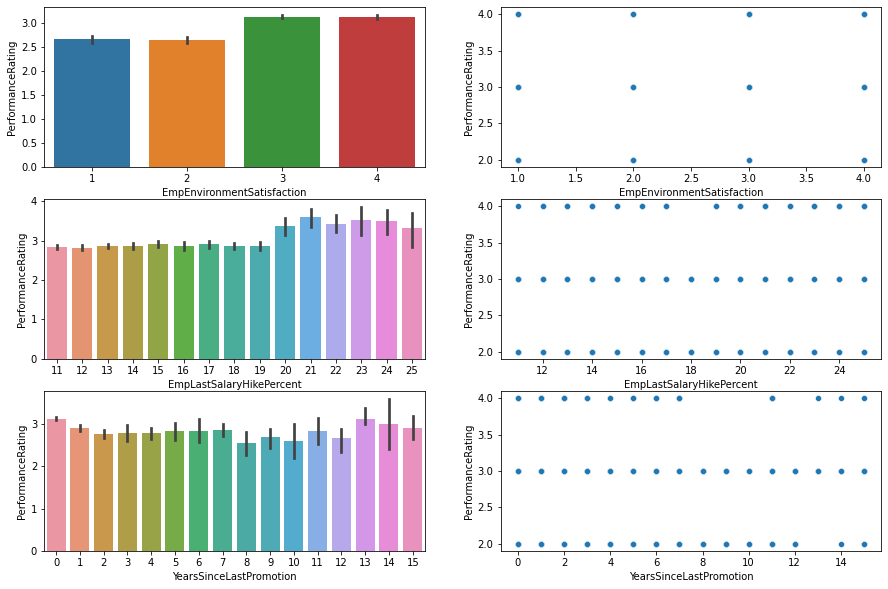

In [47]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
sb.barplot(data.EmpEnvironmentSatisfaction,data.PerformanceRating)
plt.subplot(3,2,2)
sb.scatterplot(data.EmpEnvironmentSatisfaction,data.PerformanceRating)
plt.subplot(3,2,3)
sb.barplot(data.EmpLastSalaryHikePercent,data.PerformanceRating)
plt.subplot(3,2,4)
sb.scatterplot(data.EmpLastSalaryHikePercent,data.PerformanceRating)
plt.subplot(3,2,5)
sb.barplot(data.YearsSinceLastPromotion,data.PerformanceRating)
plt.subplot(3,2,6)
sb.scatterplot(data.YearsSinceLastPromotion,data.PerformanceRating)

## Feature Selection
There are a lot of columns in the predictor variable. so Correlation coffecient is calculated to see which of them are important and these are used for training methods.
Standardadization and Lable Encoding were also used for feature transformation
## Top 3 Factors
The top 3 factors which affect the employee performance are<br> 1.EmployeeEnvironmentSatisfaction<br>
2.Employee Last Salary Hike Percent<br>
3. Years since Last Promotion

In [18]:
data.corr()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpNumber,1.000000,-0.053137,0.025922,0.023819,-0.038128,-0.234279,-0.044182,0.050270,-0.023405,0.005844,-0.041013,0.019351,0.015400,0.000275,0.041143,-0.041387,0.007214,-0.017925,0.033013,-0.008414,0.020264,0.006075,-0.005061,0.002596,0.004240,0.010905,-0.020210,-0.003163
Age,-0.053137,1.000000,-0.040107,-0.055905,-0.098368,-0.000104,-0.037665,0.040579,0.020937,0.207313,0.013814,0.062867,0.027216,0.509139,-0.002436,0.284408,0.051910,-0.006105,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.189317,-0.040164
Gender,0.025922,-0.040107,1.000000,0.009922,-0.042169,-0.010925,0.011332,-0.043608,-0.001507,-0.022960,0.000033,0.002218,0.010949,-0.050685,0.024680,-0.036675,-0.038410,-0.005319,0.030707,-0.061055,-0.057654,0.015793,-0.030392,-0.031823,-0.021575,-0.036643,0.035758,-0.001780
EducationBackground,0.023819,-0.055905,0.009922,1.000000,-0.001097,-0.026874,-0.012325,0.012382,-0.013919,-0.047978,0.045028,-0.030234,-0.025505,-0.056338,-0.030977,-0.032879,0.007046,-0.009788,0.005652,-0.027929,0.051596,0.022890,-0.009887,-0.003215,0.014277,0.002767,0.027161,0.005607
MaritalStatus,-0.038128,-0.098368,-0.042169,-0.001097,1.000000,0.067272,0.038023,0.028520,-0.019148,0.026737,-0.032467,-0.013540,-0.043355,-0.087359,0.044593,-0.030095,-0.022833,0.010128,0.026410,-0.093537,0.026045,0.014154,-0.075728,-0.076663,-0.052951,-0.061908,0.162969,0.024172
EmpDepartment,-0.234279,-0.000104,-0.010925,-0.026874,0.067272,1.000000,0.568973,-0.045233,0.007707,0.019175,-0.019237,0.003957,-0.076988,0.100526,0.007150,-0.033950,-0.026841,-0.012661,-0.050286,0.016065,0.016438,0.068875,0.047677,0.069602,0.052315,0.033850,0.048006,-0.162615
EmpJobRole,-0.044182,-0.037665,0.011332,-0.012325,0.038023,0.568973,1.000000,-0.086251,0.022939,-0.016792,0.044612,-0.016179,-0.008034,0.004406,0.032916,-0.009111,0.015075,0.005735,-0.043067,-0.049529,0.004452,-0.007519,-0.009047,0.019383,0.012190,-0.004504,0.037508,-0.096209
BusinessTravelFrequency,0.050270,0.040579,-0.043608,0.012382,0.028520,-0.045233,-0.086251,1.000000,-0.020935,0.002064,0.012267,0.025400,0.016652,0.036360,-0.031236,0.021476,0.032229,-0.041946,-0.032705,0.042736,0.006720,-0.040969,-0.015029,-0.006541,-0.020824,-0.028073,0.007217,-0.031025
DistanceFromHome,-0.023405,0.020937,-0.001507,-0.013919,-0.019148,0.007707,0.022939,-0.020935,1.000000,0.045856,-0.017719,0.013730,0.003231,0.017270,-0.003036,-0.021411,0.024940,0.044974,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,0.063248,-0.046142
EmpEducationLevel,0.005844,0.207313,-0.022960,-0.047978,0.026737,0.019175,-0.016792,0.002064,0.045856,1.000000,-0.037103,0.014095,0.027544,0.100734,0.000357,0.128674,-0.021119,0.002358,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,-0.049118,0.020529


<AxesSubplot:>

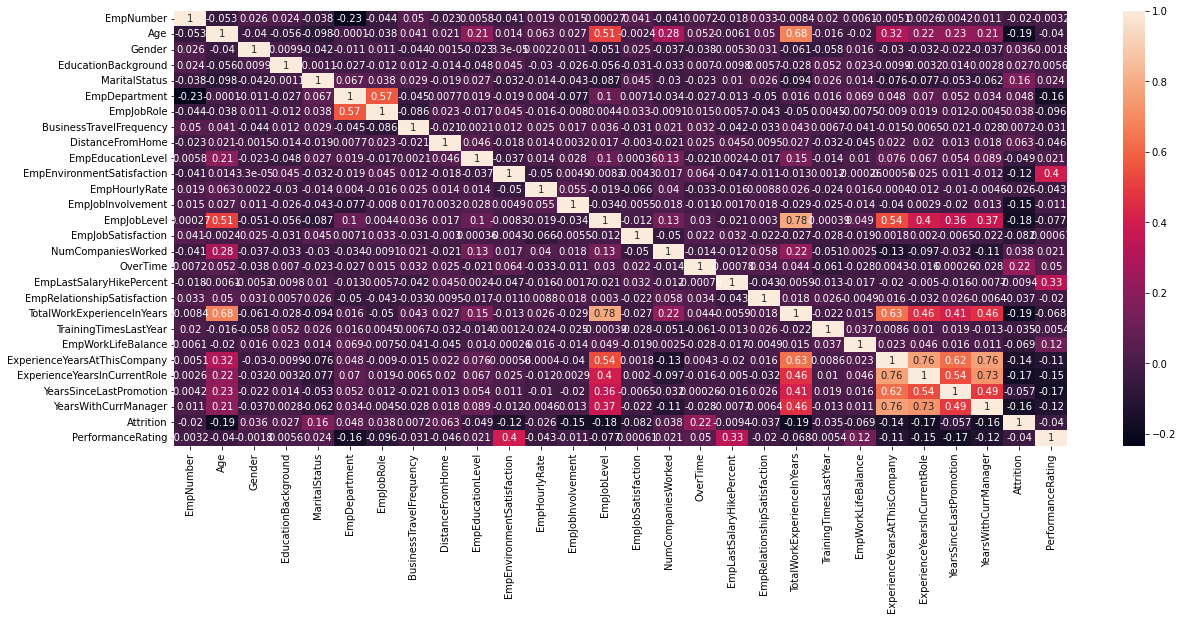

In [19]:
plt.figure(figsize=(20,8))
sb.heatmap(data.corr(),annot=True)

In [20]:
Y=data.loc[:,'PerformanceRating']
X=data.iloc[:,[5,6,10,17,21,22,23,24,25]]

In [21]:
X.columns

Index(['EmpDepartment', 'EmpJobRole', 'EmpEnvironmentSatisfaction',
       'EmpLastSalaryHikePercent', 'EmpWorkLifeBalance',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=15,shuffle=10)

In [23]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### Logistic Regression

In [24]:
model1=LogisticRegression()

In [25]:
model1.fit(x_train,y_train)

LogisticRegression()

In [26]:
y1_predict=model1.predict(x_test)

In [48]:
accuracy_score(y_test,y1_predict)*100

80.27777777777779

#### Support Vector Machine

In [28]:
model2=SVC(kernel='linear',C=100,random_state=10)

In [29]:
model2.fit(x_train,y_train)

SVC(C=100, kernel='linear', random_state=10)

In [30]:
y2_predict=model2.predict(x_test)

In [49]:
accuracy_score(y_test,y2_predict)*100

80.0

#### Decision Tree

In [32]:
model3=DecisionTreeClassifier()

In [33]:
model3.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
y3_predict=model3.predict(x_test)

In [50]:
accuracy_score(y_test,y3_predict)*100

88.05555555555556

#### Random Forest Classifier

In [36]:
model4=RandomForestClassifier(criterion='gini')

In [37]:
model4.fit(x_train,y_train)

RandomForestClassifier()

In [38]:
y4_predict=model4.predict(x_test)

In [51]:
accuracy_score(y_test,y4_predict)*100

92.22222222222223